In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import stumpy
import matplotlib.pyplot as plt

print(plt.style.available)

In [ ]:
import seaborn as sns # imported for better plot styling

# Set a unified color palette
palette = sns.color_palette("viridis", n_colors=3)
sns.set_palette(palette)
plt.style.use('dark_background')
sns.set_context("notebook", font_scale=1.2)

# Insteractive maps
# matplotlib.use('nbagg') : matplotlib uses this protocall which makes plots more user intractive like zoom in and zoom out
plt.use('nbagg')

In [11]:
# Step 1: Load the preprocessed dataset
file_path = "/scratch/gl2758/PTSA/output/train.csv"  # Path to the train.csv file
data = pd.read_csv(file_path, parse_dates=["tpep_pickup_datetime"], index_col="tpep_pickup_datetime")

# Display the first few rows of the dataset
print(data.head())

                           passenger_count  trip_distance  DOLocationID  \
tpep_pickup_datetime                                                      
2022-01-24 00:00:00+00:00             13.0          49.14        1583.0   
2022-01-24 00:30:00+00:00              9.0          51.99        1524.0   
2022-01-24 01:00:00+00:00             12.0          37.72        1242.0   
2022-01-24 01:30:00+00:00              7.0          11.99         785.0   
2022-01-24 02:00:00+00:00              7.0          15.40         998.0   

                           fare_amount  total_amount  tip_amount  \
tpep_pickup_datetime                                               
2022-01-24 00:00:00+00:00       173.00        237.35       1.615   
2022-01-24 00:30:00+00:00       174.43        245.92       2.770   
2022-01-24 01:00:00+00:00       137.50        209.51       2.110   
2022-01-24 01:30:00+00:00        50.50         86.39       2.010   
2022-01-24 02:00:00+00:00        64.50         94.95       0.000  

In [3]:
data.describe()

,passenger_count,trip_distance,DOLocationID,fare_amount,total_amount,tip_amount,pickup_count,weekday
count,10839.000000,10841.000000,10841.000000,10841.000000,10841.000000,10841.000000,10841.000000,15882.000000
mean,100.120306,210.183845,12120.823079,1063.989240,1592.139300,2.420426,75.616456,2.989044
std,58.660710,1820.006169,7294.442840,679.525521,1000.010346,0.882042,44.183356,2.012399
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,94.850000,5607.000000,448.500000,685.540000,2.050000,36.000000,1.000000
50%,108.000000,192.160000,13097.000000,1081.000000,1642.670000,2.400000,82.000000,3.000000
75%,145.000000,252.430000,17726.000000,1540.000000,2295.870000,2.950000,110.000000,5.000000
max,349.000000,153548.370000,37934.000000,4981.430000,7170.460000,15.740000,229.000000,6.000000


In [4]:
data.info

<bound method DataFrame.info of        tpep_pickup_datetime  passenger_count  trip_distance  DOLocationID  \
0      2022-01-24T00:00:00Z             13.0          49.14        1583.0   
1      2022-01-24T00:30:00Z              9.0          51.99        1524.0   
2      2022-01-24T01:00:00Z             12.0          37.72        1242.0   
3      2022-01-24T01:30:00Z              7.0          11.99         785.0   
4      2022-01-24T02:00:00Z              7.0          15.40         998.0   
...                     ...              ...            ...           ...   
15877  2023-05-15T21:30:00Z            100.0         151.09       11659.0   
15878  2023-05-15T22:00:00Z             83.0         166.39       10014.0   
15879  2023-05-15T22:30:00Z             99.0         245.44       12119.0   
15880  2023-05-15T23:00:00Z             60.0          97.92        6317.0   
15881  2023-05-15T23:30:00Z             43.0          94.45        4531.0   

       fare_amount  total_amount  tip_amoun

In [12]:
# Step 2: Select a time series column for analysis
# We'll use 'pickup_count' as the time series data for matrix profile computation
time_series = data['pickup_count'].fillna(0).values  # Replace NaN values with 0 if any

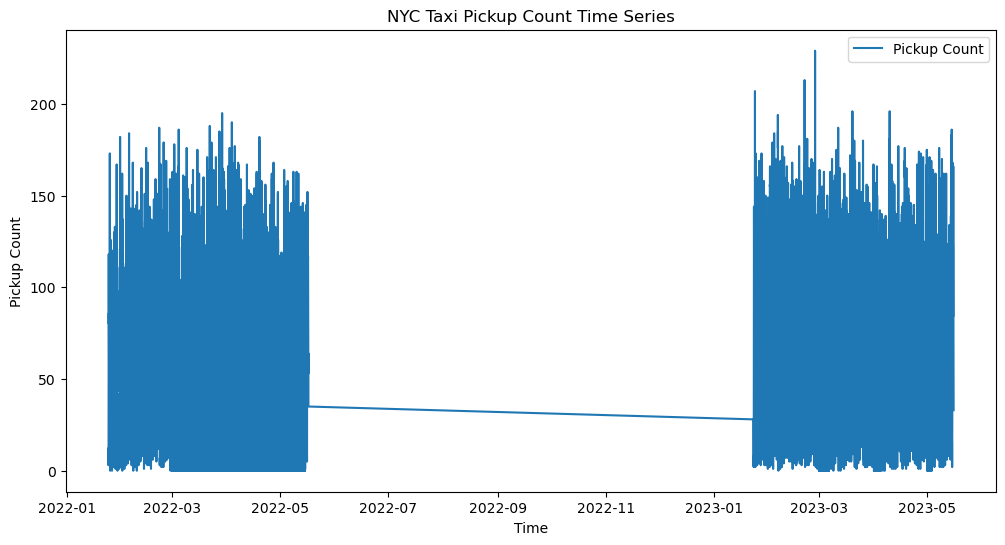

In [13]:
# Step 3: Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(data.index, time_series, label="Pickup Count")
plt.title("NYC Taxi Pickup Count Time Series")
plt.xlabel("Time")
plt.ylabel("Pickup Count")
plt.legend()
plt.show()

In [15]:
# Step 4: Compute the Matrix Profile using STUMPY
# Define a window size (number of data points in a pattern)
window_size = 50  # Adjust this value based on your domain knowledge

# Compute the matrix profile
matrix_profile = stumpy.stump(time_series, m=window_size)

# Extract the matrix profile values and their indices
profile_values = matrix_profile[:, 0]
profile_indices = matrix_profile[:, 1]

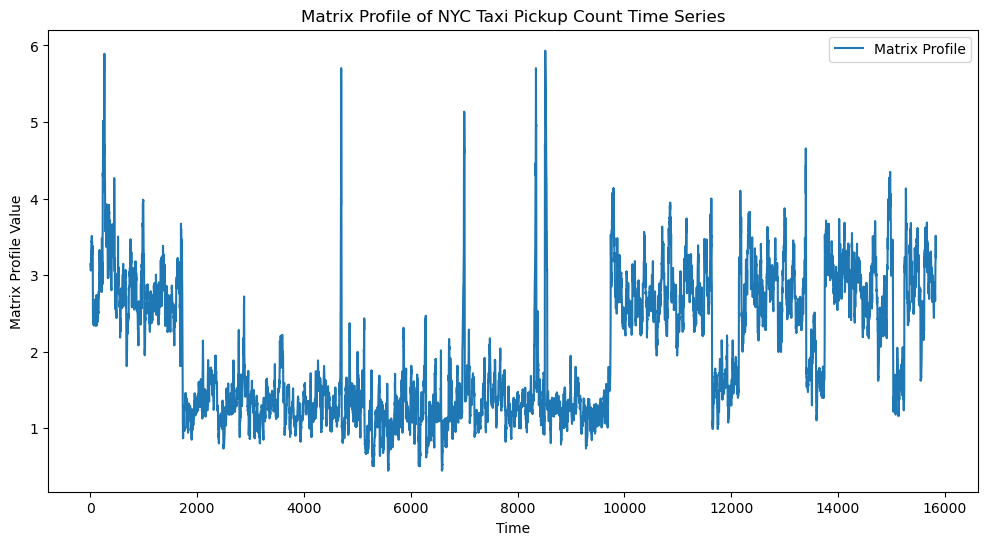

In [16]:
# Step 5: Visualize the Matrix Profile
plt.figure(figsize=(12, 6))
plt.plot(profile_values, label="Matrix Profile")
plt.title("Matrix Profile of NYC Taxi Pickup Count Time Series")
plt.xlabel("Time")
plt.ylabel("Matrix Profile Value")
plt.legend()
plt.show()

The most anomalous subsequence starts at index 8517.


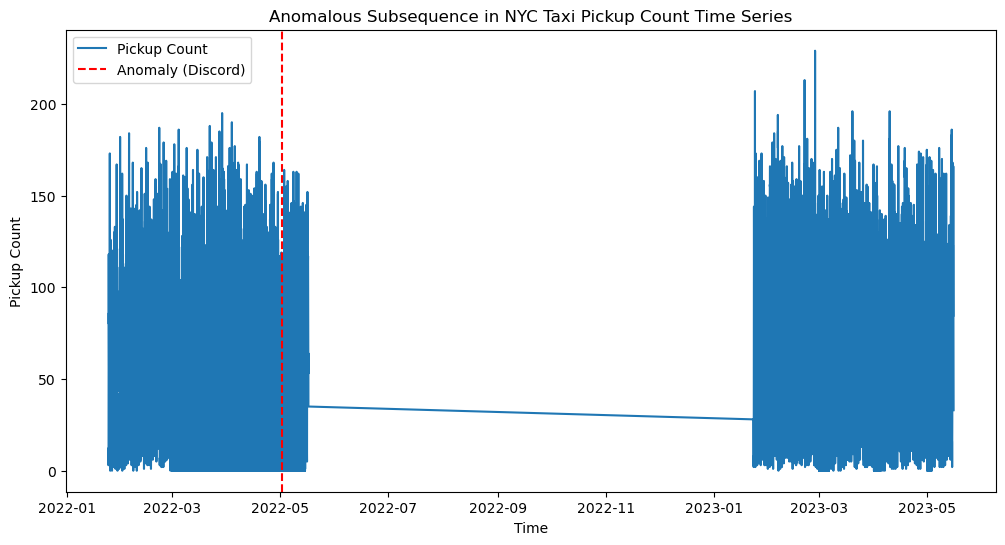

In [17]:
# Step 6: Identify Anomalies (Discords)
# Discords are points with the highest matrix profile values (anomalies)
discord_index = np.argmax(profile_values)
print(f"The most anomalous subsequence starts at index {discord_index}.")

# Highlight the discord on the original time series plot
plt.figure(figsize=(12, 6))
plt.plot(data.index, time_series, label="Pickup Count")
plt.axvline(x=data.index[discord_index], color='red', linestyle='--', label="Anomaly (Discord)")
plt.title("Anomalous Subsequence in NYC Taxi Pickup Count Time Series")
plt.xlabel("Time")
plt.ylabel("Pickup Count")
plt.legend()
plt.show()

The most similar subsequence pair starts at indices 5574 and 6582.


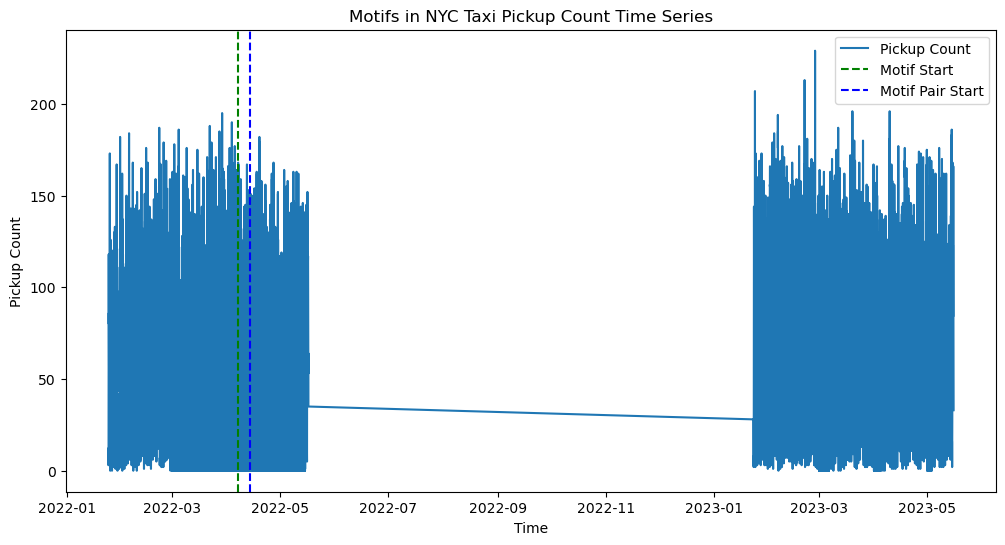

In [18]:
# Step 7: Extract Motifs (Recurring Patterns)
motif_index = np.argmin(profile_values)
motif_pair_index = profile_indices[motif_index]
print(f"The most similar subsequence pair starts at indices {motif_index} and {motif_pair_index}.")

# Visualize the motifs on the original time series plot
plt.figure(figsize=(12, 6))
plt.plot(data.index, time_series, label="Pickup Count")
plt.axvline(x=data.index[motif_index], color='green', linestyle='--', label="Motif Start")
plt.axvline(x=data.index[motif_pair_index], color='blue', linestyle='--', label="Motif Pair Start")
plt.title("Motifs in NYC Taxi Pickup Count Time Series")
plt.xlabel("Time")
plt.ylabel("Pickup Count")
plt.legend()
plt.show()

---

### Attempt 2

In [3]:
! pip uninstall matrixprofile

In [1]:
from matrixprofile import *
from matrixprofile.discords import discords
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [19]:
df = pd.read_csv('/scratch/gl2758/PTSA/output/MSG_30min_raw_test.csv')
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df = df.set_index('tpep_pickup_datetime').sort_index()

In [20]:
df.head()

,passenger_count,trip_distance,DOLocationID,fare_amount,total_amount,tip_amount,pickup_count,is_holiday,pickup_time,weekday
tpep_pickup_datetime,,,,,,,,,,
2024-01-22 00:00:00,13.0,24.75,1545,137.1,201.46,0.00,10,0,2024-01-22 00:00:00,0
2024-01-22 00:30:00,17.0,22.92,1645,122.1,193.90,0.00,14,0,2024-01-22 00:30:00,0
2024-01-22 01:00:00,15.0,35.45,2733,194.8,305.46,2.58,15,0,2024-01-22 01:00:00,0
2024-01-22 01:30:00,9.0,19.71,1280,104.0,160.07,1.00,9,0,2024-01-22 01:30:00,0
2024-01-22 02:00:00,8.0,14.74,617,78.9,114.34,0.00,6,0,2024-01-22 02:00:00,0


In [21]:
# df = df.drop(['tip_amount'], axis=1)
df_motif = df["passenger_count"]
df_motif.head()
df_motif.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 5424 entries, 2024-01-22 00:00:00 to 2024-05-13 23:30:00
Series name: passenger_count
Non-Null Count  Dtype  
--------------  -----  
5424 non-null   float64
dtypes: float64(1)
memory usage: 84.8 KB


In [22]:
df.dtypes

passenger_count    float64
trip_distance      float64
DOLocationID         int64
fare_amount        float64
total_amount       float64
tip_amount         float64
pickup_count         int64
is_holiday           int64
pickup_time         object
weekday              int64
dtype: object

In [23]:
print('target time      taxi_count', len(df))
print('target time number of fares', df["passenger_count"].sum())

target time      taxi_count 5424
target time number of fares 512146.0


In [24]:

a = df_motif.values.squeeze()

# subsequence length to compute the matrix profile
# since we have hourly measurements and want to find daily events,
# we will create a length of 24 - number of hours in a day
m = 24
profile = matrixProfile.stomp(a,m)
df['profile'] = np.append(profile[0],np.zeros(m-1)+np.nan)
df['profile_index'] = np.append(profile[1], np.zeros(m - 1) + np.nan)
df.head()

,passenger_count,trip_distance,DOLocationID,fare_amount,total_amount,tip_amount,pickup_count,is_holiday,pickup_time,weekday,profile,profile_index
tpep_pickup_datetime,,,,,,,,,,,,
2024-01-22 00:00:00,13.0,24.75,1545,137.1,201.46,0.00,10,0,2024-01-22 00:00:00,0,1.414229,479.0
2024-01-22 00:30:00,17.0,22.92,1645,122.1,193.90,0.00,14,0,2024-01-22 00:30:00,0,1.307548,480.0
2024-01-22 01:00:00,15.0,35.45,2733,194.8,305.46,2.58,15,0,2024-01-22 01:00:00,0,1.222579,481.0
2024-01-22 01:30:00,9.0,19.71,1280,104.0,160.07,1.00,9,0,2024-01-22 01:30:00,0,1.479210,482.0
2024-01-22 02:00:00,8.0,14.74,617,78.9,114.34,0.00,6,0,2024-01-22 02:00:00,0,1.517191,483.0


In [ ]:
#Plot the signal data
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
df['passenger_count'].plot(ax=ax1, kind='line', c='r')
ax1.set_ylabel('NYC Taxi Raw', size=22)

#Plot the Matrix Profile
df['profile'].plot(ax=ax2, kind='line', c='b')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Time Series Index', size=22)

plt.savefig('WSQ_4hr_MatrixProfile.png', bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [17]:
from matrixprofile.discords import discords
# exclude up to a day on the left and right side
ex_zone = 12

# we look for the 5 events specified in the data explaination
anoms = discords(df['profile'], ex_zone, k=15)
anoms

array([10626,  2179,  4478,  7268,  3181,  5198,  4006,  8519,  9282,
        3137,  6839,  8275,  2032,  7842,  2220])

In [18]:
df_anoms = df.iloc[anoms].sort_values(by='profile', ascending=False)
df_anoms

,passenger_count,trip_distance,DOLocationID,fare_amount,total_amount,tip_amount,pickup_count,is_holiday,pickup_time,weekday,profile,profile_index
tpep_pickup_datetime,,,,,,,,,,,,
2023-05-11 09:00:00,181.0,291.04,22975,2292.00,3310.34,2.800,146,0,2023-05-11 09:00:00,3,4.791743,3960.0
2022-03-10 09:30:00,114.0,171.12,16928,1080.55,1651.38,2.455,100,0,2022-03-10 09:30:00,3,4.775236,10144.0
2022-04-27 07:00:00,199.0,281.88,27746,1425.00,2344.34,2.000,168,0,2022-04-27 07:00:00,2,4.596566,8147.0
2023-03-02 10:00:00,156.0,209.34,19020,1828.00,2646.19,3.080,111,0,2023-03-02 10:00:00,3,4.581102,2705.0
2022-03-31 06:30:00,173.0,229.20,22739,1085.00,1766.08,1.980,136,0,2022-03-31 06:30:00,3,4.541865,7935.0
2022-05-12 07:00:00,163.0,217.39,22874,1110.51,1846.56,1.960,139,0,2022-05-12 07:00:00,3,4.476521,2126.0
2022-04-17 11:00:00,134.0,248.74,13361,1070.08,1548.30,1.640,88,0,2022-04-17 11:00:00,6,4.452071,7983.0
2023-03-28 11:30:00,97.0,168.50,12167,1540.00,2151.31,3.600,81,0,2023-03-28 11:30:00,1,4.434511,8567.0
2023-04-13 09:00:00,130.0,228.41,19870,1861.40,2740.72,2.920,116,0,2023-04-13 09:00:00,3,4.408587,8510.0


### What can we say about the anomalies in the WSQ data when compared to that of MSG?

In [ ]:
# We can mask some abnormalities 

mask_snow_blizard = ('2022-02-27 00:00:00' <= df_anoms.index) & (df_anoms.index <= '2022-02-28 00:00:00')
mask_new_years = ('2022-12-31 00:00:00' <= df_anoms.index) & (df_anoms.index <= '2022-12-31 23:59:00')
mask_xxx = ('2022-07-03 00:00:00' <= df_anoms.index) & (df_anoms.index <= '2022-07-04 23:59:00')
df_anoms[mask_snow_blizard + mask_new_years + mask_xxx].sort_index(ascending=True)